## Initial sRRR exploration on Purkinje cell firing rates and locomotion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings

from sparseRRR import elastic_rrr, elastic_rrr_bootstrap, elastic_rrr_cv, dimensionality, bibiplot, plot_cv_results 
from sklearn.exceptions import ConvergenceWarning

In [3]:
def preprocess(data):
    X = data['Firing rate']
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    Y = data['Locomotion']
    Y = Y - np.mean(Y, axis=0)
    Y = Y / np.std(Y, axis=0)
    
    return X,Y

In [4]:
data = pickle.load(open('../data/purkinje.pickle', 'rb'))

X,Y = preprocess(data)
cell_names = data['cell_names']
locomotion_names = data['locomotion_names']

print('Shape of X:', X.shape, '\nShape of Y:', Y.shape)

Shape of X: (2691968, 105) 
Shape of Y: (2691968, 4)


It is a lot of timepoints, so let us play around with reduced data set sizes.

In [5]:
slice = np.linspace(0, 10000, 10000, dtype=int)
slice

array([    0,     1,     2, ...,  9997,  9998, 10000])

In [46]:
w,v = elastic_rrr(X[slice,:], Y[slice,:], rank=1, alpha=.7, l1_ratio=.75)

print('\nNeurons selected: {}'.format(np.sum(w[:,0]!=0)))
print(cell_names[w[:,0]!=0])


Neurons selected: 3
[b'MC5003_S21' b'MC5003_S25' b'MC5003_S28']


In [18]:
import importlib
importlib.reload(sparseRRR)

<module 'sparseRRR' from '/Users/yvesbernaerts/Documents/PostDoc/purkinje-srrr/code/sparseRRR.py'>

In [16]:
from sparseRRR import elastic_rrr

In [11]:
X.shape

(2691968, 105)

In [17]:
w,v = elastic_rrr(X[slice,:], Y[slice,:], rank=1, alpha=.7, l1_ratio=.75)

print('\nNeurons selected: {}'.format(np.sum(w[:,0]!=0)))
print(cell_names[w[:,0]!=0])

(105, 1)
[[-0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [-0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [-0.        ]
 [-0.        ]
 [-0.42359329]
 [-0.        ]
 [-0.        ]
 [-0.16027173]
 [ 0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.        ]
 

Text(0.5, 1.0, 'Sorted row l2-norms of $W$')

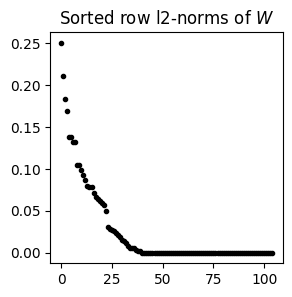

In [26]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(np.sort(np.linalg.norm(w, axis=1))[::-1], '.', color='black')
ax.set_title(r'Sorted row l2-norms of $W$')

Text(0.5, 1.0, 'Sorted row l2-norms of $W$')

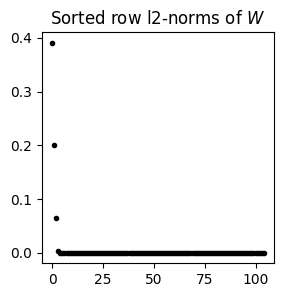

In [47]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(np.sort(np.linalg.norm(w, axis=1))[::-1], '.', color='black')
ax.set_title(r'Sorted row l2-norms of $W$')

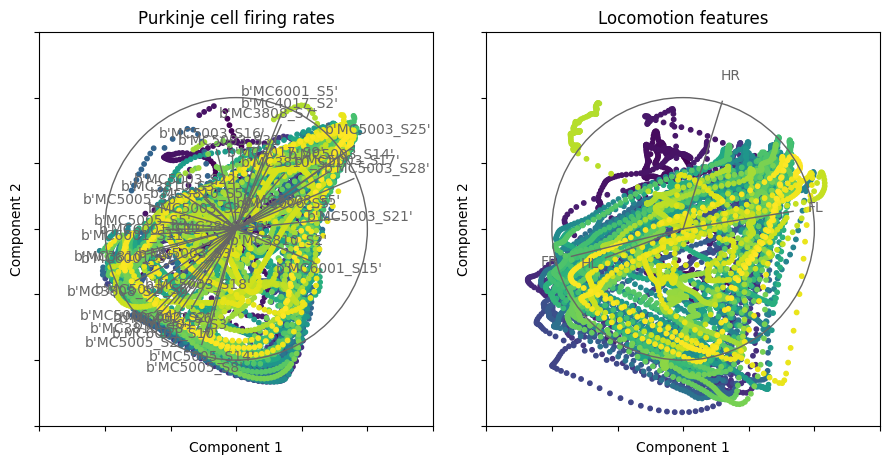

In [41]:
bibiplot(X[slice,:], Y[slice,:], w, v, 
         titles = ['Purkinje cell firing rates', 'Locomotion features'],
         #cellTypes = data['ttype'], 
         #cellTypeColors = data['colors'],
         YdimsNames = locomotion_names, 
         XdimsNames = cell_names
         )

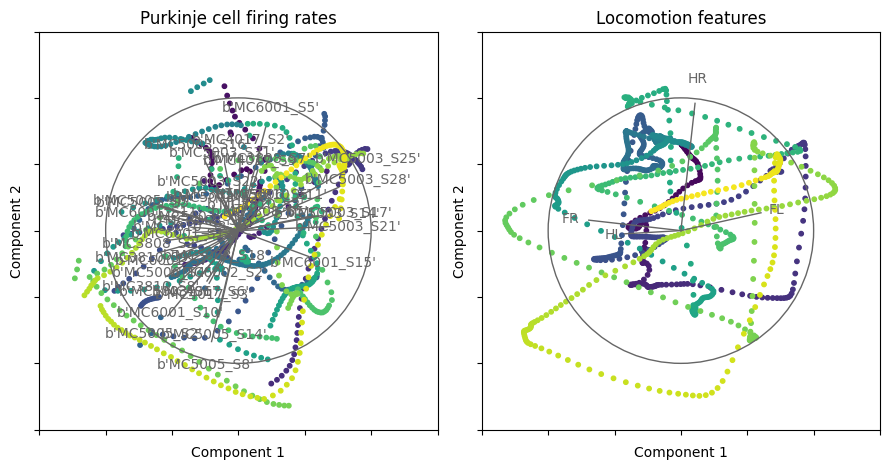

In [43]:
bibiplot(X[:1000,:], Y[:1000,:], w, v, 
         titles = ['Purkinje cell firing rates', 'Locomotion features'],
         #cellTypes = data['ttype'], 
         #cellTypeColors = data['colors'],
         YdimsNames = locomotion_names, 
         XdimsNames = cell_names
         )

In [44]:
alphas = np.concatenate((np.arange(.04,1.01,.1), np.arange(1,6)))
l1_ratios = np.array([.25, .5, .75, 1])

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=(ConvergenceWarning, RuntimeWarning))
    cvResults = elastic_rrr_cv(X[slice,:], Y[slice,:], l1_ratios=l1_ratios, alphas=alphas)


1.......... Time: 0.0h  8m 50s


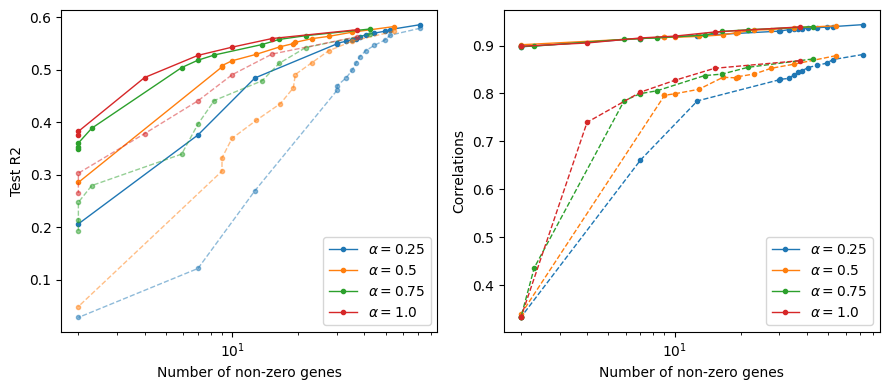

In [45]:
plot_cv_results(*cvResults, l1_ratios)

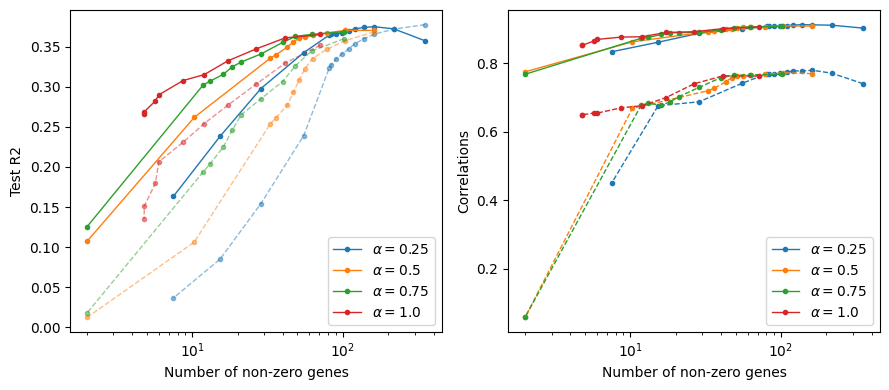

In [9]:
plot_cv_results(*cvResults, l1_ratios)

In [10]:
bootCounts = elastic_rrr_bootstrap(X, Y, alpha=.285, l1_ratio=1)

args = np.argsort(bootCounts)[::-1]
print('')
for i in range(20):
    print('{:10} {:.2f}'.format(genes[args[i]], bootCounts[args[i]]))

.................................................................................................... 

Cacna2d1   1.00
Gad1       1.00
Slc6a1     0.97
Arpp21     0.95
Pvalb      0.91
Coro6      0.89
Nxph1      0.87
Ptk2b      0.85
Mybpc1     0.85
Erbb4      0.85
Tac1       0.83
Cacna1e    0.75
Bcan       0.72
Bdnf       0.68
Tafa1      0.65
Atp1a3     0.61
Npy1r      0.57
Snca       0.55
Tmem44     0.54
Kcnv1      0.48


In [7]:
bootCounts = elastic_rrr_bootstrap(X[slice,:], Y[slice,:], alpha=.1, l1_ratio=0.75)

args = np.argsort(bootCounts)[::-1]
print('')
for i in range(20):
    print('{:10} {:.2f}'.format(cell_names[args[i]], bootCounts[args[i]]))


b'MC5003_S25' 1.00
b'MC5003_S28' 1.00
b'MC5005_S5' 1.00
b'MC3810_S8' 1.00
b'MC5003_S14' 1.00
b'MC5003_S17' 1.00
b'MC5003_S6' 1.00
b'MC5003_S21' 1.00
b'MC6001_S7' 1.00
b'MC3808_S2' 1.00
b'MC4017_S6' 1.00
b'MC6001_S12' 0.93
b'MC5005_S6' 0.90
b'MC6001_S11' 0.82
b'MC3810_S11' 0.66
b'MC3810_S9' 0.59
b'MC5006_S4' 0.49
b'MC6001_S8' 0.36
b'MC5003_S1' 0.23
b'MC6001_S15' 0.16


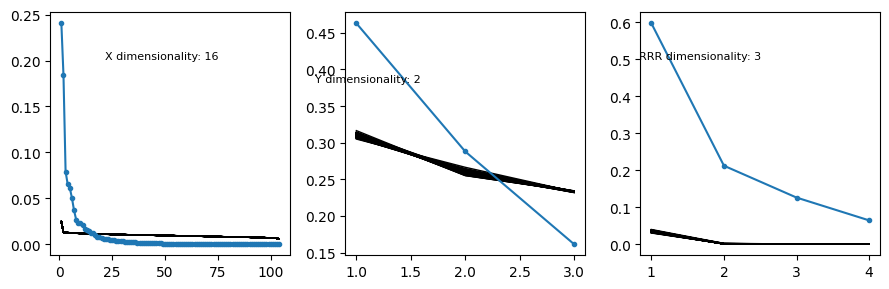

In [6]:
# A quick and dirty way to estimate the dimensionality
dimensionality(X[slice,:], Y[slice,:])